##0_Collecting Data+



In [ ]:
!pip install statsmodels

In [ ]:
import os
from google.colab import files
# uploaded = files.upload()
# Code to read csv file into Colaboratory:
#!pip install -U -q PyDrive
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import io

from google.colab import drive
# drive.mount('/content/drive')
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()

In [ ]:
#Import Library for dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

#Featuring
from pandas.plotting import autocorrelation_plot


In [ ]:
pd.set_option('display.max_rows',300)
pd.set_option('display.max_columns',100)

###Prepare Data

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Import Data Train

In [ ]:
data_train= '/content/gdrive/MyDrive/Colab Notebooks/AI 4 Indonesia/Project/Project_2-Fraud Detection/fraudTrain.csv'
dt_train = pd.read_csv(data_train)

Import Data Test

In [ ]:
data_test= '/content/gdrive/MyDrive/Colab Notebooks/AI 4 Indonesia/Project/Project_2-Fraud Detection/fraudTest.csv'
dt_test = pd.read_csv(data_test)

In [ ]:
dt_train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [ ]:
dt_test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


####Note

```
trans_date_trans_time: The date and time of the transaction.

cc_num: credit card number.

merchant: Merchant who was getting paid.

category: In what area does that merchant deal.

amt: Amount of money in American Dollars.

first: first name of the card holder.

last: last name of the card holder.

gender: Gender of the cardholder.Just male and female!

street:Street of card holder residence

city:city of card holder residence

state:state of card holder residence

zip:ZIP code of card holder residence

lat:latitude of card holder

long:longitude of card holder

city_pop:Population of the city

job:trade of the card holder

dob:Date of birth of the card holder

trans_num: Transaction ID

unix_time: Unix time which is the time calculated since 1970 to today.

merch_lat: latitude of the merchant

merch_long:longitude of the merchant

is_fraud: Whether the transaction is fraud(1) or not(0)

```

###Check Data

In [ ]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
for column in dt_train.select_dtypes(include='O').columns:
  print(f"--- {column}----")
  print(f"Jumlah Unique {dt_train[column].nunique()}")
  print('{} - Unique Values: {}'.format(column, dt_train[column].unique()))
  print()

--- trans_date_trans_time----
Jumlah Unique 1274791
trans_date_trans_time - Unique Values: ['2019-01-01 00:00:18' '2019-01-01 00:00:44' '2019-01-01 00:00:51' ...
 '2020-06-21 12:12:32' '2020-06-21 12:13:36' '2020-06-21 12:13:37']

--- merchant----
Jumlah Unique 693
merchant - Unique Values: ['fraud_Rippin, Kub and Mann' 'fraud_Heller, Gutmann and Zieme'
 'fraud_Lind-Buckridge' 'fraud_Kutch, Hermiston and Farrell'
 'fraud_Keeling-Crist' 'fraud_Stroman, Hudson and Erdman'
 'fraud_Rowe-Vandervort' 'fraud_Corwin-Collins' 'fraud_Herzog Ltd'
 'fraud_Schoen, Kuphal and Nitzsche' 'fraud_Rutherford-Mertz'
 'fraud_Kerluke-Abshire' 'fraud_Lockman Ltd' 'fraud_Kiehn Inc'
 'fraud_Beier-Hyatt' 'fraud_Schmidt and Sons' 'fraud_Lebsack and Sons'
 'fraud_Mayert Group' 'fraud_Konopelski, Schneider and Hartmann'
 'fraud_Schultz, Simonis and Little' 'fraud_Bauch-Raynor'
 'fraud_Harris Inc' 'fraud_Kling-Grant' 'fraud_Pacocha-Bauch'
 'fraud_Lesch Ltd' 'fraud_Kunde-Sanford' "fraud_Deckow-O'Conner"
 'fraud_Brue

In [ ]:
dt_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
dt_train['datetime'] = pd.to_datetime(dt_train['unix_time'], unit='s')
dt_train['trans_date_trans_time'] = pd.to_datetime(dt_train['trans_date_trans_time'])
dt_train['dob'] = pd.to_datetime(dt_train['dob'])

dt_train["datetime"].unique()

<DatetimeArray>
['2012-01-01 00:00:18', '2012-01-01 00:00:44', '2012-01-01 00:00:51',
 '2012-01-01 00:01:16', '2012-01-01 00:03:06', '2012-01-01 00:04:08',
 '2012-01-01 00:04:42', '2012-01-01 00:05:08', '2012-01-01 00:05:18',
 '2012-01-01 00:06:01',
 ...
 '2013-06-21 12:08:42', '2013-06-21 12:09:22', '2013-06-21 12:10:56',
 '2013-06-21 12:11:23', '2013-06-21 12:11:36', '2013-06-21 12:12:08',
 '2013-06-21 12:12:19', '2013-06-21 12:12:32', '2013-06-21 12:13:36',
 '2013-06-21 12:13:37']
Length: 1274823, dtype: datetime64[ns]

###Distinguish Time


In [ ]:
dt_train["transaction_hour"] = dt_train["trans_date_trans_time"].dt.hour
dt_train["transaction_day_of_week"] = dt_train["trans_date_trans_time"].dt.dayofweek #0 adlah senin dan 6 adalah minggu
dt_train["transation_day"] = dt_train["trans_date_trans_time"].dt.day

dt_train.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,datetime,transaction_hour,transaction_day_of_week,transation_day
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2012-01-01 00:00:18,0,1,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2012-01-01 00:00:44,0,1,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2012-01-01 00:00:51,0,1,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2012-01-01 00:01:16,0,1,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2012-01-01 00:03:06,0,1,1


#1_Explore Data Analysis

In [ ]:
dt_train.columns


Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'datetime', 'transaction_hour',
       'transaction_day_of_week', 'transation_day'],
      dtype='object')

In [ ]:
print(dt_train['is_fraud'].value_counts())

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


###Drop Column

In [ ]:
drop_col = ['Unnamed: 0','street','merchant','zip','first','last','trans_num','job']
dt_train.drop(drop_col, axis =1, inplace = True)
dt_train.columns

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender', 'city',
       'state', 'lat', 'long', 'city_pop', 'dob', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'datetime', 'transaction_hour',
       'transaction_day_of_week', 'transation_day'],
      dtype='object')

##Check Relation Feature

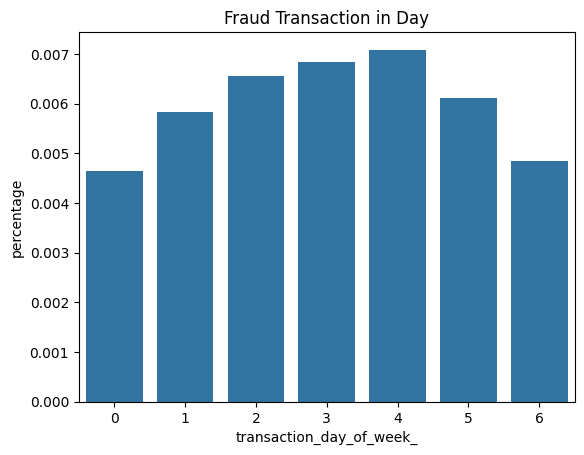

In [ ]:
hour_trx_fraud = dt_train.groupby(
    ['transaction_day_of_week'],as_index=False
).agg({
    "is_fraud":["count","sum"]
})

hour_trx_fraud.columns = ['_'.join(x) for x in hour_trx_fraud.columns]
hour_trx_fraud["percentage"] = hour_trx_fraud.is_fraud_sum/hour_trx_fraud.is_fraud_count

plt.title("Fraud Transaction in Day")
sns.barplot(data=hour_trx_fraud,y="percentage",x="transaction_day_of_week_",orient="v");

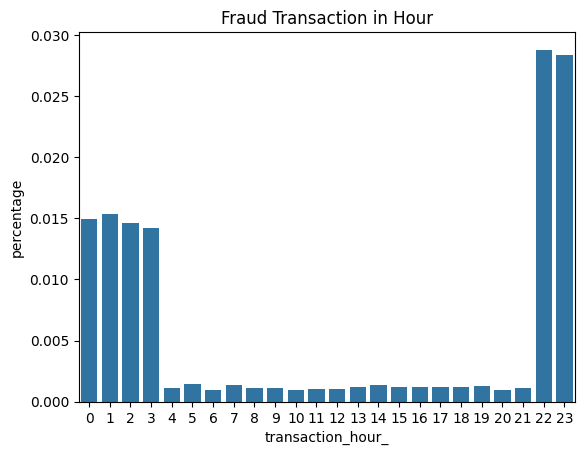

In [ ]:
hour_trx_fraud = dt_train.groupby(
    ['transaction_hour'],as_index=False
).agg({
    "is_fraud":["count","sum"]
})

hour_trx_fraud.columns = ['_'.join(x) for x in hour_trx_fraud.columns]
hour_trx_fraud["percentage"] = hour_trx_fraud.is_fraud_sum/hour_trx_fraud.is_fraud_count

plt.title("Fraud Transaction in Hour")
sns.barplot(data=hour_trx_fraud,y="percentage",x="transaction_hour_",orient="v")

plt.show()

In [ ]:
#menghitung jarak kejadian transaksi
import math

def haversine_distance(lat1,lon1,lat2,lon2):
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = math.sin(dlat/2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    radius_bumi = 6371 #satuan km

    distance = radius_bumi * c

    return distance

dt_train["distance_sender_receiver"] = dt_train.apply(lambda row:haversine_distance(row["lat"],row["long"],row["merch_lat"],row["merch_long"]),axis=1).round(2)

<Axes: xlabel='distance_sender_receiver'>

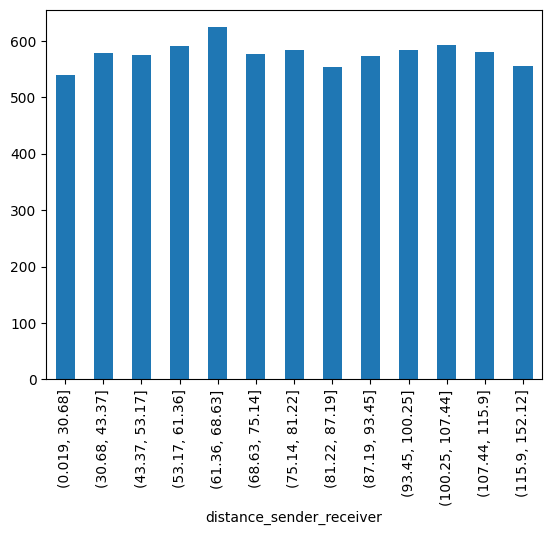

In [ ]:
dt_train.groupby(pd.qcut(
    dt_train["distance_sender_receiver"],q=13

))["is_fraud"].sum().plot(kind="bar")

<Axes: xlabel='amt'>

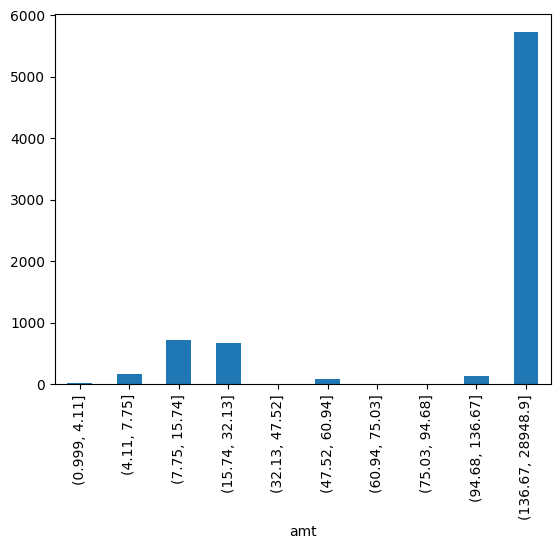

In [ ]:
dt_train.groupby(pd.qcut(
    dt_train["amt"],q=10
))["is_fraud"].sum().plot(kind="bar")

In [ ]:
from datetime import datetime

dt_train["Age"] = dt_train["dob"].apply(lambda row : (datetime.now() - row).days/365.25)
dt_train["Age"] = dt_train["Age"].round(0)

<Axes: xlabel='Age'>

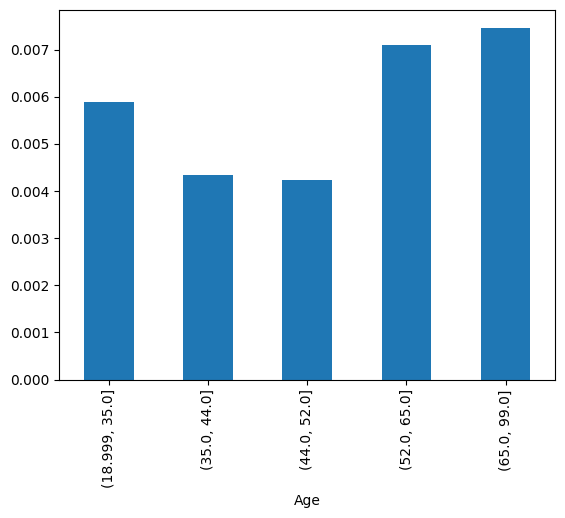

In [ ]:
dt_train.groupby(pd.qcut(
    dt_train["Age"],q=5
))["is_fraud"].mean().plot(kind="bar")

#**2_Preprocessing**

###Train Data

In [ ]:
from sklearn.model_selection import train_test_split

cols_keep = ["amt","distance_sender_receiver","transaction_hour","transaction_day_of_week","city_pop","Age"]

X = dt_train[cols_keep]
y= dt_train[["is_fraud"]]



X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors = 5))])

pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier())])

In [ ]:
#--- Evaluation ---
from sklearn.metrics import (
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

In [ ]:
def calculate_metrics(model, X_train, y_train, X_test, y_test):

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    train_accuracy = balanced_accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_pred)


    test_accuracy = balanced_accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_pred)


    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
        'Train': [train_accuracy, train_precision, train_recall, train_f1, train_roc_auc],
        'Test': [test_accuracy, test_precision, test_recall, test_f1, test_roc_auc]
    })

    return metrics_df


metrics_df = calculate_metrics(pipeline, X_train, y_train, X_test, y_test)
metrics_df

,Metric,Train,Test
0,Accuracy,0.756376,0.723385
1,Precision,0.839664,0.757895
2,Recall,0.513323,0.447602
3,F1 Score,0.637137,0.562814
4,ROC AUC,0.756376,0.723385


#3_testing

In [ ]:
dt_test['datetime'] = pd.to_datetime(dt_test['unix_time'], unit='s')
dt_test['trans_date_trans_time'] = pd.to_datetime(dt_test['trans_date_trans_time'])
dt_test['dob'] = pd.to_datetime(dt_test['dob'])

dt_test["datetime"].unique()

<DatetimeArray>
['2013-06-21 12:14:25', '2013-06-21 12:14:33', '2013-06-21 12:14:53',
 '2013-06-21 12:15:15', '2013-06-21 12:15:17', '2013-06-21 12:15:37',
 '2013-06-21 12:15:44', '2013-06-21 12:15:50', '2013-06-21 12:16:10',
 '2013-06-21 12:16:11',
 ...
 '2013-12-31 23:57:18', '2013-12-31 23:57:50', '2013-12-31 23:57:56',
 '2013-12-31 23:58:04', '2013-12-31 23:58:34', '2013-12-31 23:59:07',
 '2013-12-31 23:59:09', '2013-12-31 23:59:15', '2013-12-31 23:59:24',
 '2013-12-31 23:59:34']
Length: 544760, dtype: datetime64[ns]

In [ ]:
dt_test["transaction_hour"] = dt_test["trans_date_trans_time"].dt.hour
dt_test["transaction_day_of_week"] = dt_test["trans_date_trans_time"].dt.dayofweek #0 adlah senin dan 6 adalah minggu
dt_test["transation_day"] = dt_test["trans_date_trans_time"].dt.day

dt_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,distance_sender_receiver,Age,datetime,transaction_hour,transaction_day_of_week,transation_day
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,24.56,36.0,2013-06-21 12:14:25,12,6,21
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,104.93,46.0,2013-06-21 12:14:33,12,6,21
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,59.08,62.0,2013-06-21 12:14:53,12,6,21
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,27.70,57.0,2013-06-21 12:15:15,12,6,21
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,104.34,38.0,2013-06-21 12:15:17,12,6,21


In [ ]:
#menghitung jarak kejadian transaksi
import math

def haversine_distance(lat1,lon1,lat2,lon2):
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = math.sin(dlat/2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    radius_bumi = 6371 #satuan km

    distance = radius_bumi * c

    return distance

dt_test["distance_sender_receiver"] = dt_test.apply(lambda row:haversine_distance(row["lat"],row["long"],row["merch_lat"],row["merch_long"]),axis=1).round(2)

<Axes: xlabel='distance_sender_receiver'>

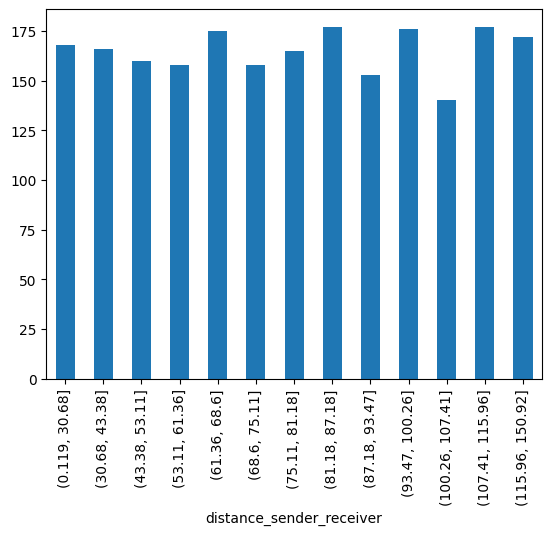

In [ ]:
dt_test.groupby(pd.qcut(
    dt_test["distance_sender_receiver"],q=13

))["is_fraud"].sum().plot(kind="bar")

<Axes: xlabel='amt'>

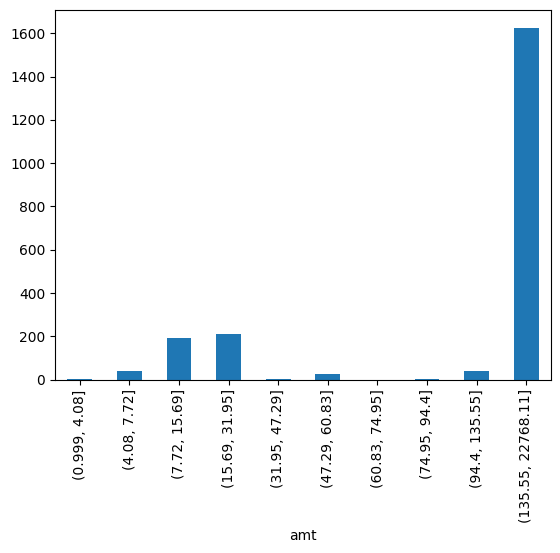

In [ ]:
dt_test.groupby(pd.qcut(
    dt_test["amt"],q=10
))["is_fraud"].sum().plot(kind="bar")

In [ ]:
from datetime import datetime

dt_test["Age"] = dt_train["dob"].apply(lambda row : (datetime.now() - row).days/365.25)
dt_test["Age"] = dt_train["Age"].round(0)

<Axes: xlabel='Age'>

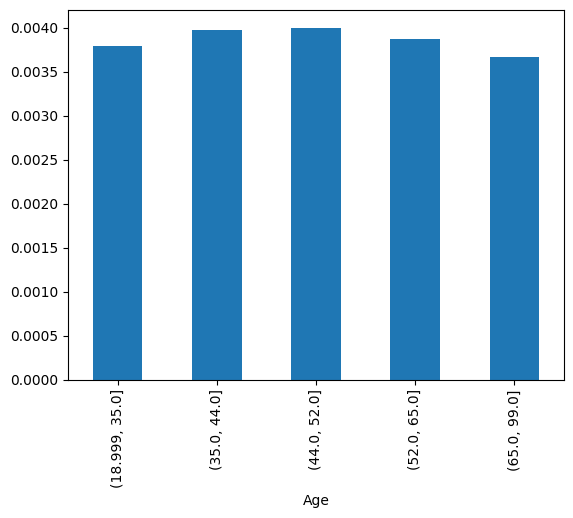

In [ ]:
dt_test.groupby(pd.qcut(
    dt_test["Age"],q=5
))["is_fraud"].mean().plot(kind="bar")

In [ ]:
cols_keep = ["amt","distance_sender_receiver","transaction_hour","transaction_day_of_week","city_pop","Age"]

X = dt_test[cols_keep]
y= dt_test[["is_fraud"]]



X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=42)

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors = 5))])

pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier())])

In [ ]:
metrics_df = calculate_metrics(pipeline, X_train, y_train, X_test, y_test)
metrics_df

,Metric,Train,Test
0,Accuracy,0.693637,0.669652
1,Precision,0.762779,0.634783
2,Recall,0.387742,0.340062
3,F1 Score,0.514134,0.442872
4,ROC AUC,0.693637,0.669652


#4_Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
model = [forecastARIMA, forecastAutoArima, forecastSarima, forecastAutoSarima,forecastSarimax, forecastLSTM]
model_name = ['Arima', 'AutoArima', 'Sarima', 'AutoSarima','Sarimax', 'LSTM']
metrics = []

for i in range(len(model)):
    mae = mean_absolute_error(model[i]['test'], model[i]['forecast'])
    mse = mean_squared_error(model[i]['test'], model[i]['forecast'])
    r2 = r2_score(model[i]['test'], model[i]['forecast'])
    metrics.append([mae, mse, r2])

metrics = pd.DataFrame(metrics, columns=['MAE', 'MSE', 'R2'], index=model_name)
metrics

,MAE,MSE,R2
Arima,0.937718,1.872635,-0.034605
AutoArima,0.914477,1.895499,-0.047237
Sarima,0.914477,1.895499,-0.047237
AutoSarima,0.914477,1.895499,-0.047237
Sarimax,0.930315,1.869823,-0.033051
LSTM,0.981066,2.003587,-0.106954
